In [1]:
__author__ = "Lisette Espin"
__copyright__ = "Copyright 2019, GESIS / USC-ISI"
__credits__ = ["Lisette Espin-Noboa", 
               "Fariba Karimi", 
               "Bruno Ribeiro",
               "Kristina Lerman",
               "Claudia Wagner"]
__license__ = "GPL"
__version__ = "1.0.1"
__maintainer__ = "Lisette Espin"
__email__ = "lisette.espin@gesis.org"
__status__ = "Development"

<h1 style="text-align: center;">Plots in Paper</h1>

<h2>Dependencies</h2>

In [2]:
%load_ext autoreload
%autoreload 2

import os
from org.gesis.network.network import Network
from org.gesis.sampling.sampling import Sampling
from org.gesis.local.local import Local
from org.gesis.relational.relational import Relational
from org.gesis.inference.inference import Inference
from org.gesis.inference.inference import get_inference_summary_fn
from utils import viz
from utils import io
from utils import prediction
from utils import estimator
from utils import empirical

<h2>Parameters</h2>

In [3]:
kind = "all"                    # network generative model type
sampling = "all"                # subgraph sampling method (nodes, nedges, degree, neighbors, partial_crawls)
LC = "prior"                    # local model
RC = "nBC"                      # relational model
CI = "relaxation"               # inference
MODEL = "BAH"                   # main network model
x = 5                           # number of networks same type
EPOCHS = 10                     # number of times relational classification is done in 1 network
SMALLP = 0.3                    # pseeds <= small p (SMALL SAMPLES)
DATAPATH = "../data/"           # directory to store networks (gpickle)
OUTPUT = "../results-batch/"    # directory to store results
OUTPUT_PLOTS = os.path.join(OUTPUT, 'plots')
OUTPUT_SUMMARY = get_inference_summary_fn(OUTPUT, kind, LC, RC, CI, sampling)
LATEX = True

<h2>Load results</h2>

In [4]:
df_results_original = io.load_csv(OUTPUT_SUMMARY)
df_results_original.head()

,kind,dataset,N,m,density,B,H,Hmm,HMM,i,...,EEcp10,EEcp11,EEcp01,SEp0,SEp1,SEcp00,SEcp11,SEcpDiff,SEcpSum,SE
0,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,-0.004287,0.004287,0.002496,0.000052,0.000052,6.232411e-06,0.000018,-0.000012,0.000025,0.000077
1,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,0.001172,-0.001172,0.002529,0.000026,0.000026,6.396694e-06,0.000001,0.000005,0.000008,0.000034
2,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,0.025567,-0.025567,-0.000672,0.000252,0.000252,4.513109e-07,0.000654,-0.000653,0.000654,0.000906
3,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,0.037696,-0.037696,0.030464,0.000183,0.000183,9.280391e-04,0.001421,-0.000493,0.002349,0.002532
4,BAH,-,2000,20,0.01981,0.3,0.9,0.9,0.9,3.0,...,-0.004075,0.004075,0.000640,0.000061,0.000061,4.101122e-07,0.000017,-0.000016,0.000017,0.000078


<h2>Plotting setup</h2>

In [5]:
viz.plot_setup(LATEX)
df_results, columns = viz.latex_compatible_dataframe(df_results_original, LATEX)    
df_results.shape

(87590, 49)

<div style="text-align:center;"><h2>RQ1: Network Structure</h2></div>

In [6]:
sampling = 'nodes'
df_rq1 = df_results.query("kind==@MODEL and dataset=='-' & sampling==@sampling")
df_rq1.shape

(66000, 49)

<h3>1.1. Network structure vs. Global performance</h3>

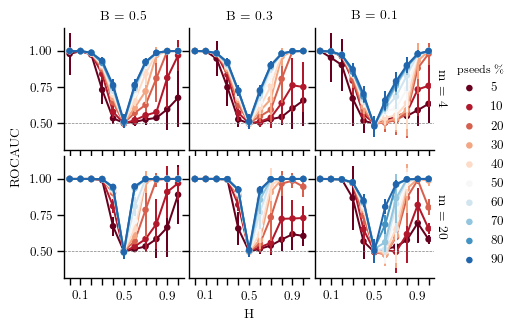

In [7]:
N = 2000
sampling = 'nodes'

fn = os.path.join(OUTPUT_PLOTS, 'R1_ROCAUC_H_{}_N{}_x{}_RUNS{}.pdf'.format(sampling, N, x, EPOCHS))
viz.plot_rocauc_vs_homophily_per_B_m_pseeds(df_rq1.query("N==@N"), columns, fn=fn)

<h3>1.2 Conditional Probability Estimation error: Majority vs minority</h3>

../results-batch/plots/R1_SE_condprob_N2000_m4_leqP30_nodes.pdf saved!


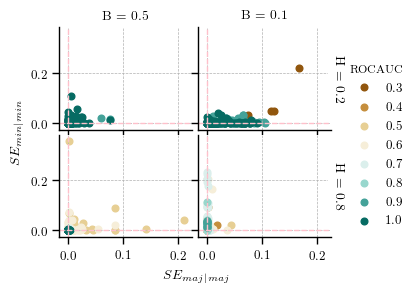

In [8]:
N = 2000
m = 4
H = [0.2, 0.8]
B = [0.1, 0.5]
sampling = 'nodes'

fn = os.path.join(OUTPUT_PLOTS, 'R1_SE_condprob_N{}_m{}_leqP{}_{}.pdf'.format(N, m, int(100*SMALLP), sampling))
viz.plot_estimation_errors_per_H_B_rocauc(df_rq1.query("N==@N & m==@m & pseeds<=@SMALLP & H in @H & B in @B"), 
                                          columns, metricx='SEcp00', metricy='SEcp11', fn=fn)

<h3>1.3 Real World vs. BAH Model</h3>

Datasets description

In [9]:
df_evalues = empirical.load_evalues(OUTPUT)
df_empirical = empirical.get_summary_datasets(DATAPATH, df_evalues, output=OUTPUT)
df_empirical

,dataset,N,m,class,minority,B,E,density,Emm,EMM,EmM,gamma,gammam,gammaM,Hmm,HMM
0,Caltech36,701,1,gender,1,0.325250,15464,0.063028,2351,3413,9700,4.898462,4.656218,3.526275,0.64,0.43
1,Escorts,16730,1,role,escort,0.395935,39044,0.000279,0,19420,19624,2.870386,2.477017,4.397491,0.00,0.00
2,GitHub,37700,1,mltarget,1,0.258329,289003,0.000407,19684,21280,248039,2.544116,2.658579,2.538155,0.68,1.00
3,Swarthmore42,1519,1,gender,2,0.492429,53726,0.046600,13689,12474,27563,5.503634,4.997918,4.985283,0.48,0.56
4,USF51,1705,1,gender,2,0.404106,15597,0.010737,1798,4598,9201,4.218993,3.683327,4.631682,0.43,0.45
5,Wikipedia,2132,1,gender,female,0.153377,3143,0.001384,125,294,2724,2.873377,3.610080,2.825921,0.74,0.54


In [10]:
sampling = 'nodes'
df_realworld = df_results.query("dataset!='-' & sampling==@sampling").copy()

df_realworld.loc[:, 'B'] = df_realworld.B.round(2)
df_realworld.loc[:, 'H'] = df_realworld.H.round(2)
df_realworld.shape

(3600, 49)

../results-batch/plots/R1_ROCAUC_pseeds_nodes_empirical_vs_BAH_RUNS10.pdf saved!


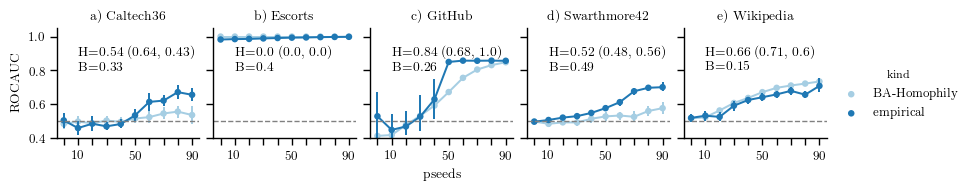

In [11]:
sampling = 'nodes'
fn = os.path.join(OUTPUT_PLOTS, 'R1_ROCAUC_pseeds_{}_empirical_vs_BAH_RUNS{}.pdf'.format(sampling, EPOCHS))
viz.plot_model_vs_data(df_realworld.query("dataset != 'USF512009'"), fn) 

<div style="text-align:center;"><h2>RQ2: Sample Structure</h2></div>

In [12]:
N = 2000
m = 4
H = [0.2, 0.8]
B = [0.1, 0.5]

df_rq2 = df_results.query("kind==@MODEL & N==@N & m==@m & H in @H & B in @B & pseeds<=@SMALLP & sampling!='neighbors'")
df_rq2.shape


(3190, 49)

<h3>Comparison of estimation errors (small samples)</h3>

### Available metrics:
--------------------------------------------------------------------------

#### Estimation error: estimated - observed
 - 'EEp1','EEp0',       prior error
 - 'EEcp00','EEcp10',   conditional prob. x given majority error
 - 'EEcp11','EEcp01',   conditional prob. x given minority error
 
#### Squared Error: (estimated - observed)^2
 - 'SEp1',
 - 'SEcp00', 
 - 'SEcp11',

#### Overall Errors
 - 'SEcpDiff',  Diff of the 2 cp SE
 - 'SEcpSum',   Sum of all 2 cp SE
 - 'SE',        sum of all 3 SE


nodes
../results-batch/plots/R2_SE_estimates_leqP30_nodes.pdf saved!


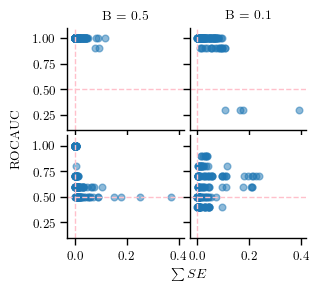

nedges
../results-batch/plots/R2_SE_estimates_leqP30_nedges.pdf saved!


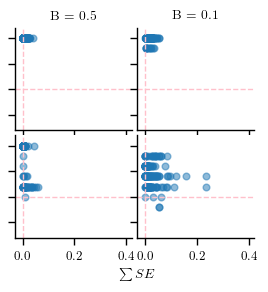

degree
../results-batch/plots/R2_SE_estimates_leqP30_degree.pdf saved!


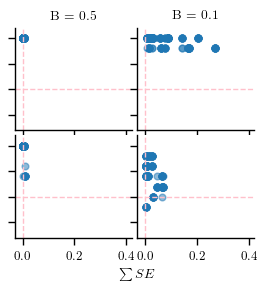

partial\_crawls
../results-batch/plots/R2_SE_estimates_leqP30_partialcrawls.pdf saved!


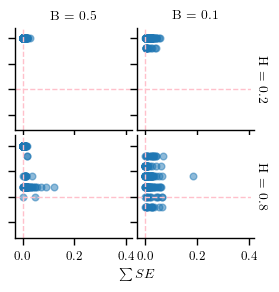

In [13]:
sampling = 'all'
fn = os.path.join(OUTPUT_PLOTS, 'R2_SE_estimates_leqP{}_<sampling>.pdf'.format(int(100*SMALLP)))
viz.plot_estimation_errors_per_H_B_rocauc_sampling(df_rq2, columns, 'SE', 'rocauc', sampling, fn)

<div style="text-align:center;"><h2>RQ3: Fairness</h2></div>

In [14]:
H = [0.2, 0.5, 0.8]

df_rq3 = df_results.query("kind==@MODEL & N==@N & m==@m & H in @H & pseeds <= @SMALLP & sampling != 'neighbors'")
df_rq3.head()

,kind,dataset,N,m,density,B,H,Hmm,HMM,i,...,EEcp\_{10},EEcp\_{11},EEcp\_{01},SEp\_{0},SEp\_{1},SEcp\_{00},SEcp\_{11},SEcpDiff,SEcpSum,SE
302,BAH,-,2000,4,0.003994,0.5,0.5,0.5,0.5,1.0,...,0.042340,-0.042340,-0.048491,0.003460,0.003460,0.002351,0.001793,0.000559,0.004144,0.007604
303,BAH,-,2000,4,0.003994,0.5,0.5,0.5,0.5,1.0,...,0.042340,-0.042340,-0.048491,0.003460,0.003460,0.002351,0.001793,0.000559,0.004144,0.007604
304,BAH,-,2000,4,0.003994,0.5,0.5,0.5,0.5,1.0,...,0.006680,-0.006680,-0.043030,0.001336,0.001336,0.001852,0.000045,0.001807,0.001896,0.003232
305,BAH,-,2000,4,0.003994,0.5,0.5,0.5,0.5,1.0,...,0.027041,-0.027041,-0.037175,0.001046,0.001046,0.001382,0.000731,0.000651,0.002113,0.003159
307,BAH,-,2000,4,0.003994,0.5,0.5,0.5,0.5,1.0,...,0.042340,-0.042340,-0.048491,0.003460,0.003460,0.002351,0.001793,0.000559,0.004144,0.007604


<h3>Performance Bias</h3>

../results-batch/plots/R3_BIAS_bars_leqP30.pdf saved!


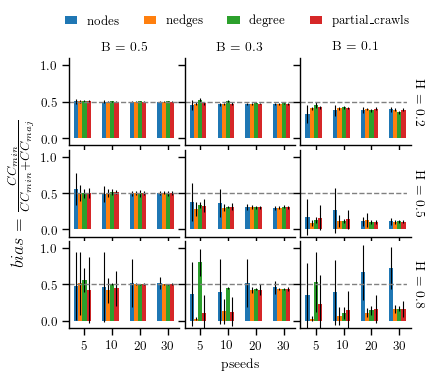

In [15]:
fn = os.path.join(OUTPUT_PLOTS, 'R3_BIAS_bars_leqP{}.pdf'.format(int(100*SMALLP)))
viz.plot_bias_vs_pseeds_per_B_H_sampling(df_rq3, columns, fn=fn)